In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.impute import SimpleImputer

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

pd.set_option('display.max_columns', None)

import random
random.seed(21)

np.random.seed(21)

# Data information

In [3]:
#train statistic
df_train = pd.read_csv('data/bank_data_train.csv')

train_stat = df_train.describe(include = 'all')
train_stat.loc['dtype'] = df_train.dtypes
train_stat.loc['size'] = len(df_train)
train_stat.loc['%missing'] = df_train.isnull().mean()
train_stat

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,355190.0,355190.0,316867.0,155163.0,60550.0,155163.0,155163.0,355190.0,77112.0,77112.0,316867.0,155163.0,111052.0,69421,155163.0,155163.0,355190.0,111052.0,155163.0,68234,355190.0,355190.0,355190.0,68967.0,59361,44781,316867.0,210811,57257,316867.0,68104,66296.0,68967.0,155163.0,155163.0,316867.0,57257,155163.0,355190.0,57256,355190.0,66296.0,60545,355190.0,316867.0,316867.0,355190.0,355190.0,115877.0,355190.0,115877.0,355190.0,355190.0,67362,114898.0,8001.0,1241.0,355190.0,8001.0,1240.0,8001.0,114898.0,355190.0,355190.0,8001.0,1888.0,67362,355190.0,355190.0,198718.0,355190.0,355190.0,198718.0,355190.0,255595.0,205874.0,355190.0,255595.0,70449.0,1628.0,95713.0,155995.0,95713.0,205874.0,355190.0,155995.0,69433.0,355190.0,355190,1881.0,2808.0,355190.0,69433.0,355190.0,8001.0,355190.0,712.0,303194.0,8001.0,303194.0,8001.0,355190.0,95713.0,355190.0,1888.0,93448.0,355190.0,95713.0,93448.0,98175.0,95713.0,355190.0,93448.0,93448.0,93448.0,355190.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,13,NaN,NaN,NaN,NaN,5,4,NaN,19588,2,NaN,17,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRIEND,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,SO,SPECIALIST,NaN,ДИРЕКТОР,N,NaN,H,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,N,NaN,NaN,SPECIALIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN,NaN,NaN,NaN,NaN

In [4]:
#test statistic

df_test = pd.read_csv('data/bank_data_test.csv')

test_stat = df_test.describe(include = 'all')
test_stat.loc['dtype'] = df_test.dtypes
test_stat.loc['size'] = len(df_test)
test_stat.loc['%missing'] = df_test.isnull().mean()
test_stat

,ID,CR_PROD_CNT_IL,AMOUNT_RUB_CLO_PRC,PRC_ACCEPTS_A_EMAIL_LINK,APP_REGISTR_RGN_CODE,PRC_ACCEPTS_A_POS,PRC_ACCEPTS_A_TK,TURNOVER_DYNAMIC_IL_1M,CNT_TRAN_AUT_TENDENCY1M,SUM_TRAN_AUT_TENDENCY1M,AMOUNT_RUB_SUP_PRC,PRC_ACCEPTS_A_AMOBILE,SUM_TRAN_AUT_TENDENCY3M,CLNT_TRUST_RELATION,PRC_ACCEPTS_TK,PRC_ACCEPTS_A_MTP,REST_DYNAMIC_FDEP_1M,CNT_TRAN_AUT_TENDENCY3M,CNT_ACCEPTS_TK,APP_MARITAL_STATUS,REST_DYNAMIC_SAVE_3M,CR_PROD_CNT_VCU,REST_AVG_CUR,CNT_TRAN_MED_TENDENCY1M,APP_KIND_OF_PROP_HABITATION,CLNT_JOB_POSITION_TYPE,AMOUNT_RUB_NAS_PRC,CLNT_JOB_POSITION,APP_DRIVING_LICENSE,TRANS_COUNT_SUP_PRC,APP_EDUCATION,CNT_TRAN_CLO_TENDENCY1M,SUM_TRAN_MED_TENDENCY1M,PRC_ACCEPTS_A_ATM,PRC_ACCEPTS_MTP,TRANS_COUNT_NAS_PRC,APP_TRAVEL_PASS,CNT_ACCEPTS_MTP,CR_PROD_CNT_TOVR,APP_CAR,CR_PROD_CNT_PIL,SUM_TRAN_CLO_TENDENCY1M,APP_POSITION_TYPE,TURNOVER_CC,TRANS_COUNT_ATM_PRC,AMOUNT_RUB_ATM_PRC,TURNOVER_PAYM,AGE,CNT_TRAN_MED_TENDENCY3M,CR_PROD_CNT_CC,SUM_TRAN_MED_TENDENCY3M,REST_DYNAMIC_FDEP_3M,REST_DYNAMIC_IL_1M,APP_EMP_TYPE,SUM_TRAN_CLO_TENDENCY3M,LDEAL_TENOR_MAX,LDEAL_YQZ_CHRG,CR_PROD_CNT_CCFP,DEAL_YQZ_IR_MAX,LDEAL_YQZ_COM,DEAL_YQZ_IR_MIN,CNT_TRAN_CLO_TENDENCY3M,REST_DYNAMIC_CUR_1M,REST_AVG_PAYM,LDEAL_TENOR_MIN,LDEAL_AMT_MONTH,APP_COMP_TYPE,LDEAL_GRACE_DAYS_PCT_MED,REST_DYNAMIC_CUR_3M,CNT_TRAN_SUP_TENDENCY3M,TURNOVER_DYNAMIC_CUR_1M,REST_DYNAMIC_PAYM_3M,SUM_TRAN_SUP_TENDENCY3M,REST_DYNAMIC_IL_3M,CNT_TRAN_ATM_TENDENCY3M,CNT_TRAN_ATM_TENDENCY1M,TURNOVER_DYNAMIC_IL_3M,SUM_TRAN_ATM_TENDENCY3M,DEAL_GRACE_DAYS_ACC_S1X1,AVG_PCT_MONTH_TO_PCLOSE,DEAL_YWZ_IR_MIN,SUM_TRAN_SUP_TENDENCY1M,DEAL_YWZ_IR_MAX,SUM_TRAN_ATM_TENDENCY1M,REST_DYNAMIC_PAYM_1M,CNT_TRAN_SUP_TENDENCY1M,DEAL_GRACE_DAYS_ACC_AVG,TURNOVER_DYNAMIC_CUR_3M,PACK,MAX_PCLOSE_DATE,LDEAL_YQZ_PC,CLNT_SETUP_TENOR,DEAL_GRACE_DAYS_ACC_MAX,TURNOVER_DYNAMIC_PAYM_3M,LDEAL_DELINQ_PER_MAXYQZ,TURNOVER_DYNAMIC_PAYM_1M,CLNT_SALARY_VALUE,TRANS_AMOUNT_TENDENCY3M,MED_DEBT_PRC_YQZ,TRANS_CNT_TENDENCY3M,LDEAL_USED_AMT_AVG_YQZ,REST_DYNAMIC_CC_1M,LDEAL_USED_AMT_AVG_YWZ,TURNOVER_DYNAMIC_CC_1M,AVG_PCT_DEBT_TO_DEAL_AMT,LDEAL_ACT_DAYS_ACC_PCT_AVG,REST_DYNAMIC_CC_3M,MED_DEBT_PRC_YWZ,LDEAL_ACT_DAYS_PCT_TR3,LDEAL_ACT_DAYS_PCT_AAVG,LDEAL_DELINQ_PER_MAXYWZ,TURNOVER_DYNAMIC_CC_3M,LDEAL_ACT_DAYS_PCT_TR,LDEAL_ACT_DAYS_PCT_TR4,LDEAL_ACT_DAYS_PCT_CURR,TARGET
count,88798.0,88798.0,79198.0,38520.0,15332.0,38520.0,38520.0,88798.0,19282.0,19282.0,79198.0,38520.0,27584.0,17497,38520.0,38520.0,88798.0,27584.0,38520.0,17208,88798.0,88798.0,88798.0,17240.0,14982,11302,79198.0,52852,14520,79198.0,17188,16500.0,17240.0,38520.0,38520.0,79198.0,14520,38520.0,88798.0,14520,88798.0,16500.0,15255,88798.0,79198.0,79198.0,88798.0,88798.0,28901.0,88798.0,28901.0,88798.0,88798.0,17001,28456.0,2108.0,333.0,88798.0,2108.0,323.0,2108.0,28456.0,88798.0,88798.0,2108.0,504.0,17001,88798.0,88798.0,49663.0,88798.0,88798.0,49663.0,88798.0,63824.0,51451.0,88798.0,63824.0,17445.0,426.0,23817.0,38927.0,23817.0,51451.0,88798.0,38927.0,17222.0,88798.0,88798,504.0,751.0,88798.0,17222.0,88798.0,2108.0,88798.0,173.0,75844.0,2108.0,75844.0,2108.0,88798.0,23817.0,88798.0,504.0,23281.0,88798.0,23817.0,23281.0,24452.0,23817.0,88798.0,23281.0,23281.0,23281.0,0.0
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,5,4,NaN,9857,2,NaN,17,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FRIEND,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,NaN,NaN,SO,SPECIALIST,NaN,ДИРЕКТОР,N,NaN,H,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,N,NaN,NaN,SPECIALIST,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PRIVATE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102,NaN,NaN,NaN,

# Data preprocessing


## df_train processing

In [5]:
train_indices = df_train['ID']
train_y = df_train['TARGET']
train_all_X = df_train.drop(['ID','TARGET'], axis = 1) 

#split into numeric/chars
train_stat = df_train.describe(include = 'all')
uniq = train_stat.loc['unique']
cat_columns = uniq[uniq.notnull()].index.tolist()
num_columns = list(set(train_all_X.columns).difference(set(cat_columns)))

In [6]:
#split train-validation
train_X, val_X, train_y, val_y = train_test_split(train_all_X, train_y, test_size = 0.2, random_state=21)

In [7]:
#use only numeric

train_X_num = train_X[num_columns]
val_X_num = val_X[num_columns]

#1 - fillnan = -1 for constant columns 
train_stat = train_X_num.describe()
non_constant_columns_stat = ((train_stat.loc['max'] - train_stat.loc['min']) > 0)
non_constant_columns = non_constant_columns_stat[non_constant_columns_stat == 1].index.tolist()

constant_columns_stat = ((train_stat.loc['max'] - train_stat.loc['min']) <= 0)
constant_column = constant_columns_stat[constant_columns_stat == 1].index.tolist()[0]

train_new_column = train_X_num[constant_column].map(lambda x: 1, na_action='ignore').fillna(-1)
val_new_column = val_X_num[constant_column].map(lambda x: 1, na_action='ignore').fillna(-1)

train_X1 = pd.concat([train_X_num[non_constant_columns], train_new_column], axis = 1)
val_X1 = pd.concat([val_X_num[non_constant_columns], val_new_column], axis = 1)

#2 - scaler - StandardScaler

sc = StandardScaler()
sc.fit(train_X1)

train_X2 = pd.DataFrame(sc.transform(train_X1), columns = sc.feature_names_in_)
val_X2 = pd.DataFrame(sc.transform(val_X1), columns = sc.feature_names_in_)

In [8]:
#3 - median imputation

train_X3 = train_X2.fillna(train_X2.median())
val_X3 = val_X2.fillna(val_X2.median())

In [9]:
#4 add categorical vars

#4.1 apply upper case
train_X_cat = train_X[cat_columns].apply(lambda x: x.str.upper())
val_X_cat = val_X[cat_columns].apply(lambda x: x.str.upper())

#4.2 join similar meaning  

TRUST_RELATION = {"Друг": "FRIEND",
                   "Мать": "MOTHER",
                   "мать": "MOTHER",
                   "Отец": "FATHER",
                   "Дочь": "DAUGHTER",
                   'Брат': 'BROTHER',
                   'Сестра': 'SISTER',
                   'Сын' : 'SON'}

train_X_cat['CLNT_TRUST_RELATION'] = train_X_cat['CLNT_TRUST_RELATION'].replace(TRUST_RELATION)
val_X_cat['CLNT_TRUST_RELATION'] = val_X_cat['CLNT_TRUST_RELATION'].replace(TRUST_RELATION)

#4.3 remove values with freq < 1000 in train
for col in cat_columns:
    vc = train_X_cat[col].value_counts()
    remove_list = vc[vc < 1000].index.tolist()
    keep_list = list(set(vc.index) - set(remove_list))
    train_X_cat[col] = train_X_cat[col].replace(remove_list, 'remove')
    remove_list_val = list(set(val_X_cat[col].value_counts().index) - set(keep_list))
    val_X_cat[col] = val_X_cat[col].replace(remove_list_val, 'remove')
    train_X_cat[col] = train_X_cat[col].fillna('remove')
    val_X_cat[col] = val_X_cat[col].fillna('remove')

In [10]:
#4.5 - OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit(train_X_cat)
train_oe_results = oe_style.transform(train_X_cat)
val_oe_results = oe_style.transform(val_X_cat)

codded_names = list()
for cat in oe_style.categories_:
    codded_names += cat.tolist()
print("New colomns: \n", codded_names)
train_X_ohe = pd.DataFrame(train_oe_results.toarray(), columns=codded_names).drop(['remove'], axis = 1)
val_X_ohe = pd.DataFrame(val_oe_results.toarray(), columns=codded_names).drop(['remove'], axis = 1)

New colomns: 
 ['BROTHER', 'DAUGHTER', 'FATHER', 'FRIEND', 'MOTHER', 'OTHER', 'RELATIVE', 'SISTER', 'SON', 'remove', 'D', 'M', 'T', 'V', 'remove', 'JO', 'NPRIVAT', 'OTHER', 'RENT', 'SO', 'remove', 'MANAGER', 'SELF_EMPL', 'SPECIALIST', 'TOP_MANAGER', 'remove', 'remove', 'АДМИНИСТРАТОР', 'БУХГАЛТЕР', 'ВОДИТЕЛЬ', 'ГЕН. ДИРЕКТОР', 'ГЕН.ДИРЕКТОР', 'ГЕНЕРАЛЬНЫЙ ДИРЕКТОР', 'ГЛАВНЫЙ БУХГАЛТЕР', 'ДИЗАЙНЕР', 'ДИРЕКТОР', 'ЗАМ. ДИРЕКТОРА', 'ЗАМ.ДИРЕКТОРА', 'ЗАМЕСТИТЕЛЬ ДИРЕКТОРА', 'ИНДИВИДУАЛЬНЫЙ ПРЕДПРИНИМАТЕЛЬ', 'ИНЖЕНЕР', 'КОММЕРЧЕСКИЙ ДИРЕКТОР', 'МЕНЕДЖЕР', 'МЕНЕДЖЕР ПО ПРОДАЖАМ', 'НАЧАЛЬНИК ОТДЕЛА', 'ПРЕДПРИНИМАТЕЛЬ', 'ПРОГРАММИСТ', 'ПРОДАВЕЦ', 'РУКОВОДИТЕЛЬ', 'СПЕЦИАЛИСТ', 'СТУДЕНТ', 'N', 'Y', 'remove', 'H', 'HH', 'S', 'SS', 'UH', 'remove', 'N', 'Y', 'remove', 'N', 'Y', 'remove', 'MANAGER', 'SELF_EMPL', 'SPECIALIST', 'TOP_MANAGER', 'remove', 'INTER', 'PRIVATE', 'STATE', 'remove', 'INTER', 'PRIVATE', 'STATE', 'remove', '101', '102', '103', '104', '105', '107', '301', 'K01', 'O01', 'remove']


In [11]:
#4.6 - add categorial feachers
train_X4 = pd.concat([train_X3, train_X_ohe], axis = 1)
val_X4 = pd.concat([val_X3, val_X_ohe], axis = 1)

In [12]:
#5 - select best feachers

#k = 85 tested on log reg with binar search
np.random.seed(21)
sb = SelectKBest(f_classif, k=85)
sb.fit(train_X4, train_y)
train_X5 = sb.transform(train_X4)
val_X5 = sb.transform(val_X4)

## test_df best processing apply 

In [13]:
test_indices = df_test['ID']
test_all_X = df_test.drop(['ID'], axis = 1)

In [14]:
#use only numeric

test_X_num = test_all_X[num_columns]

#1 - fillnan = -1 for constant columns 

test_new_column = test_X_num[constant_column].map(lambda x: 1, na_action='ignore').fillna(-1)
test_X1 = pd.concat([test_X_num[non_constant_columns], test_new_column], axis = 1)

#2 - scaler - StandardScaler

sc = StandardScaler()
sc.fit(train_X1)

test_X2 = pd.DataFrame(sc.transform(test_X1), columns = sc.feature_names_in_)

#3 - median imputation

test_X3 = test_X2.fillna(test_X2.median())

In [15]:
#4 add categorical vars

#4.1 apply upper case
test_X_cat = test_all_X[cat_columns].apply(lambda x: x.str.upper())

#4.2 join similar meaning  

TRUST_RELATION = {"Друг": "FRIEND",
                   "Мать": "MOTHER",
                   "мать": "MOTHER",
                   "Отец": "FATHER",
                   "Дочь": "DAUGHTER",
                   'Брат': 'BROTHER',
                   'Сестра': 'SISTER',
                   'Сын' : 'SON'}

test_X_cat['CLNT_TRUST_RELATION'] = test_X_cat['CLNT_TRUST_RELATION'].replace(TRUST_RELATION)

#4.2 remove values with freq < 1000 in train
for col in cat_columns:
    vc = train_X_cat[col].value_counts()
    remove_list = vc[vc < 1000].index.tolist()
    keep_list = list(set(vc.index) - set(remove_list))
    train_X_cat[col] = train_X_cat[col].replace(remove_list, 'remove')
    remove_list_test = list(set(test_X_cat[col].value_counts().index) - set(keep_list))
    test_X_cat[col] = test_X_cat[col].replace(remove_list_test, 'remove')
    train_X_cat[col] = train_X_cat[col].fillna('remove')
    test_X_cat[col] = test_X_cat[col].fillna('remove')

In [16]:
#4.5 - OneHotEncoder

oe_style = OneHotEncoder()
oe_results = oe_style.fit(train_X_cat)
test_oe_results = oe_style.transform(test_X_cat)

codded_names = list()
for cat in oe_style.categories_:
    codded_names += cat.tolist()
test_X_ohe = pd.DataFrame(test_oe_results.toarray(), columns=codded_names).drop(['remove'], axis = 1)

#4.6 - add categorial feachers
test_X4 = pd.concat([test_X3, test_X_ohe], axis = 1)

In [17]:
#5 - select best feachers

#k = 85 tested on log reg with binar search
sb = SelectKBest(f_classif, k=85)
sb.fit(train_X4, train_y)
test_X5 = sb.transform(test_X4)

# Define global table for metrics saving

In [27]:
df_metrics = pd.DataFrame(columns=['model', 'hyperparams', 'accuracy', 'roc_auc'])
df_metrics

,model,hyperparams,accuracy,roc_auc


# Naive classifier

In [19]:
from collections import Counter

class ft_naive_classifier():
    def __init__(self):
        self.major_label = None

    def fit(self, X, y):
        y_np = np.array(y)
        counter = Counter(y_np)
        self.major_label = counter.most_common(1)[0][0]

    def predict(self, X):
        len = X.shape[0]
        return np.ones([len]) * self.major_label

In [20]:
nc = ft_naive_classifier()
nc.fit(train_X5, train_y)
predicted = nc.predict(val_X5)

ac =  accuracy_score(np.array(val_y), predicted)
rocauc = roc_auc_score(np.array(val_y), predicted)
print("Accuracy:", ac)
print("ROC AUC:", rocauc)

Accuracy: 0.9196064078380585
ROC AUC: 0.5


In [28]:
df_metrics = df_metrics.append(
    pd.DataFrame({'model' : ["Naive classifier"],
                                "hyperparams" : ["baseline"],
                                'accuracy' : "0.919606", 
                                'roc_auc' : "0.5"})
)

df_metrics

/var/folders/9j/mrbb80v92lxdv_3kldctnqq00000gn/T/ipykernel_19384/4283971078.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(


,model,hyperparams,accuracy,roc_auc
0,Naive classifier,baseline,0.919606,0.5


# Random forest

In [34]:
#decrease train counts to run gread search

train_X5_rf, _, train_y_rf, _ = train_test_split(train_X5, train_y, test_size = 0.8, random_state=21)

In [35]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# The function to measure the quality of a split. 
criterion = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 300, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import time

rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
start_time = time.time()
rf_random = RandomizedSearchCV(estimator = rf, scoring = 'roc_auc', param_distributions = random_grid, n_iter = 30, cv = 2, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
rf_random.fit(train_X5_rf, train_y_rf)

print(rf_random.best_score_)
print(rf_random.best_params_)
print("Running time: ", (time.time() - start_time) / 60)

Fitting 2 folds for each of 30 candidates, totalling 60 fits
[CV] END bootstrap=True, criterion=gini, max_depth=271, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  12.5s
[CV] END bootstrap=True, criterion=gini, max_depth=271, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  13.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=155, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  56.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=155, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=  57.5s
[CV] END bootstrap=False, criterion=gini, max_depth=300, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=  58.6s
[CV] END bootstrap=False, criterion=gini, max_depth=300, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time= 1.0min
[CV] END bootstrap=True, criterion=gini, max_depth=155, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total

/Users/olgaborisova/Library/Python/3.10/lib/python/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=False, criterion=gini, max_depth=242, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time= 3.4min
[CV] END bootstrap=True, criterion=gini, max_depth=155, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 1.1min
[CV] END bootstrap=False, criterion=entropy, max_depth=39, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time= 1.7min
[CV] END bootstrap=True, criterion=gini, max_depth=155, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 1.2min
[CV] END bootstrap=False, criterion=gini, max_depth=242, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time= 1.8min
[CV] END bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  28.8s
[CV] END bootstrap=True, criterion=entropy, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=  23.6s
[CV] END bootstrap=False, criterion=entropy,

In [37]:
rand_for_class = RandomForestClassifier(**rf_random.best_params_)
rand_for_class.fit(train_X5, train_y)
val_pred = rand_for_class.predict(val_X5)
acc = accuracy_score(val_y, val_pred)
print("Val acc: ", acc)
roc_auc = roc_auc_score(val_y, val_pred)
print("Val roc_auc: ", roc_auc)

Val acc:  0.9202117176722318
Val roc_auc:  0.5072801123661398


0.8273161597526945
{'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 300, 'criterion': 'gini', 'bootstrap': True}
Running time:  167.47443417310714

In [29]:
#hyperparams = rf_random.best_params_.items()
df_metrics = df_metrics.append(
    pd.DataFrame({'model' : ["Rand_forest"],
                                "hyperparams" : "{'n_est': 1600, 'min_samp_splt': 2, 'min_samp_leaf': 4, 'max_depth': 300, 'criterion': 'entropy', 'bootstrap': True}",
                                'accuracy' : "0.920211", 
                                'roc_auc' : "0.507280"})
)
df_metrics

/var/folders/9j/mrbb80v92lxdv_3kldctnqq00000gn/T/ipykernel_19384/184664107.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(


,model,hyperparams,accuracy,roc_auc
0,Naive classifier,baseline,0.919606,0.5
0,Rand_forest,"{'n_est': 1600, 'min_samp_splt': 2, 'min_samp_...",0.920211,0.507280


# Scikit-learn MLP

## tuning layear_sizes

In [39]:
#for one hidden layer
for i in range(10, 100, 20):

    arr = [i]
    clf = MLPClassifier(random_state=1, hidden_layer_sizes = arr)
    clf.fit(train_X5, train_y)
    proba_y = clf.predict_proba(val_X5)[:, 1]
    predict_y = clf.predict(val_X5)
    print(i)
    print("acc train = ", clf.score(train_X5, train_y), "acc val = ", accuracy_score(val_y, predict_y))
    print("roc_auc = ", roc_auc_score(val_y, proba_y))

10
acc train =  0.9187406740054619 acc val =  0.9185224809257018
roc_auc =  0.8171258111848652
30
acc train =  0.9199653706466961 acc val =  0.919465638109181
roc_auc =  0.820335967141337
50
acc train =  0.9205882766969791 acc val =  0.917382246121794
roc_auc =  0.8174322769154191
70
acc train =  0.9214223373405783 acc val =  0.9190010980038853
roc_auc =  0.8082751815612513
90
acc train =  0.9230763816548889 acc val =  0.9139896956558462
roc_auc =  0.8018605332750306


In [40]:
#for one hidden layer
for i in [15, 18, 20, 22, 24, 25]:

    arr = [i]
    clf = MLPClassifier(random_state=1, hidden_layer_sizes = arr)
    clf.fit(train_X5, train_y)
    proba_y = clf.predict_proba(val_X5)[:, 1]
    predict_y = clf.predict(val_X5)
    print(i)
    print("acc train = ", clf.score(train_X5, train_y), "acc val = ", accuracy_score(val_y, predict_y))
    print("roc_auc = ", roc_auc_score(val_y, proba_y))

15
acc train =  0.9189694248148879 acc val =  0.9190010980038853
roc_auc =  0.8240707657748952
18
acc train =  0.9187441932486838 acc val =  0.9180157099017427
roc_auc =  0.8250556980699097
20
acc train =  0.9193882147582983 acc val =  0.9183254033052732
roc_auc =  0.8273038482960513
22
acc train =  0.9191770601649821 acc val =  0.9162279343449985
roc_auc =  0.8198764548313828
24
acc train =  0.9192087333539796 acc val =  0.91828317238661
roc_auc =  0.8222536904485229
25
acc train =  0.9197331005940482 acc val =  0.9178749401728652
roc_auc =  0.8257964725694436


In [41]:
#try two layers
import itertools
one_layer = list(range(10, 60, 20))
layer_size_cases = list(itertools.product(one_layer, one_layer))

for size in layer_size_cases:
    clf = MLPClassifier(random_state=1, hidden_layer_sizes = size)
    clf.fit(train_X5, train_y)
    proba_y = clf.predict_proba(val_X5)[:, 1]
    predict_y = clf.predict(val_X5)
    print(size)
    print("acc train = ", clf.score(train_X5, train_y), "acc val = ", accuracy_score(val_y, predict_y))
    print("roc_auc = ", roc_auc_score(val_y, proba_y))

(10, 10)
acc train =  0.9192122525972015 acc val =  0.9195923308651708
roc_auc =  0.821961579451957
(10, 30)
acc train =  0.9192192910836454 acc val =  0.9196064078380585
roc_auc =  0.8214547424882277
(10, 50)
acc train =  0.9193107914074158 acc val =  0.9196486387567218
roc_auc =  0.7947591092701409
(30, 10)
acc train =  0.9206340268588643 acc val =  0.9198457163771503
roc_auc =  0.8131626394684499
(30, 30)
acc train =  0.9214786452321293 acc val =  0.918789943410569
roc_auc =  0.8110711181393213
(30, 50)
acc train =  0.9222423210112898 acc val =  0.9192826374616403
roc_auc =  0.8161048198409586
(50, 10)
acc train =  0.9215631070694558 acc val =  0.9192685604887525
roc_auc =  0.7949153026066511
(50, 30)
acc train =  0.9235409217601847 acc val =  0.9167910132605085
roc_auc =  0.8040276143000082
(50, 50)
acc train =  0.9251210619668346 acc val =  0.9182409414679468
roc_auc =  0.7895254223089432


best is 20

In [60]:
#compare activation function

for act in ['identity', 'logistic', 'tanh', 'relu']:

    clf = MLPClassifier( random_state = 1, hidden_layer_sizes = [20], activation = act)
    clf.fit(train_X5, train_y)
    proba_y = clf.predict_proba(val_X5)[:, 1]
    predict_y = clf.predict(val_X5)
    print(act)
    print("acc train = ", clf.score(train_X5, train_y), "acc val = ", accuracy_score(val_y, predict_y))
    print("roc_auc = ", roc_auc_score(val_y, proba_y))

identity
acc train =  0.9184274613587095 acc val =  0.9193389453531913
roc_auc =  0.738539578285282
logistic
acc train =  0.9195430614600636 acc val =  0.9180579408204059
roc_auc =  0.8130700888924307
tanh
acc train =  0.919578253892283 acc val =  0.917832709254202
roc_auc =  0.8176415014183847
relu
acc train =  0.9193882147582983 acc val =  0.9183254033052732
roc_auc =  0.8273038482960513


In [61]:
for rand in [1, 2, 31, 21, 42]:

    clf = MLPClassifier( random_state = rand, hidden_layer_sizes = [20])
    clf.fit(train_X5, train_y)
    proba_y = clf.predict_proba(val_X5)[:, 1]
    predict_y = clf.predict(val_X5)
    print(rand)
    print("acc train = ", clf.score(train_X5, train_y), "acc val = ", accuracy_score(val_y, predict_y))
    print("roc_auc = ", roc_auc_score(val_y, proba_y))

1
acc train =  0.9193882147582983 acc val =  0.9183254033052732
roc_auc =  0.8273038482960513
2
acc train =  0.9187371547622399 acc val =  0.9156226245108252
roc_auc =  0.825431346890551
31
acc train =  0.9190750021115459 acc val =  0.9181001717390692
roc_auc =  0.8234608175681852
21
acc train =  0.9193002336777499 acc val =  0.9176919395253245
roc_auc =  0.8277295490493085
42
acc train =  0.919243925786199 acc val =  0.9187054815732425
roc_auc =  0.8233001265669132


In [63]:
#final
clf = MLPClassifier(random_state=21, hidden_layer_sizes = [20])
clf.fit(train_X5, train_y)
proba_y = clf.predict_proba(val_X5)[:, 1]
predict_y = clf.predict(val_X5)
print("Final: random_state=21, hidden_layer_sizes = [20]")
acc = accuracy_score(val_y, predict_y)
print("acc train = ", clf.score(train_X5, train_y), "acc val = ", acc)
roc_auc = roc_auc_score(val_y, proba_y)
print("roc_auc = ", roc_auc)

Final: random_state=21, hidden_layer_sizes = [20]
acc train =  0.9193002336777499 acc val =  0.9176919395253245
roc_auc =  0.8277295490493085


In [30]:
df_metrics = df_metrics.append(
    pd.DataFrame({'model' : ["MLP"],
                                "hyperparams" : ["rand_st=21, layers = [20], act_f = relu"],
                                'accuracy' : "0.917691", 
                                'roc_auc' : "0.82772"})
)

/var/folders/9j/mrbb80v92lxdv_3kldctnqq00000gn/T/ipykernel_19384/2869709709.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(


In [31]:
df_metrics

,model,hyperparams,accuracy,roc_auc
0,Naive classifier,baseline,0.919606,0.5
0,Rand_forest,"{'n_est': 1600, 'min_samp_splt': 2, 'min_samp_...",0.920211,0.507280
0,MLP,"rand_st=21, layers = [20], act_f = relu",0.917691,0.82772


# Numpy

In [77]:
from numpy.random import default_rng
import matplotlib.pyplot as plt

class multilayer_perceptron():  
    def __init__(self, shape, lr, gamma = 0.9, epochs = 100, batch_size = 1):
        #hyperparameters
        self.shape = shape
        self.layers = len(shape)
        self.lr = lr
        self.gamma = gamma
        self.epochs = epochs
        self.bs = batch_size
        
        #train atr
        self.weights, self.biases = self.init_param()
        self.v_weights, self.v_biases = self.init_param(weights_zero = True)
        self.a = list()
        self.z = list()
        self.f_activ = np.vectorize(self.relu)
        self.f_activ_der = np.vectorize(self.relu_der)
        
        #score atr
        self.train_loss = list()
        self.val_loss = list()
        self.train_accuracy = list()
        self.val_accuracy = list()
    
    def init_param(self, weights_zero = False):
        weights = list()
        biases = list()
        np.random.seed(100)
        for i in range(self.layers - 1):
            if weights_zero == True:
                w = np.zeros((self.shape[i+1], self.shape[i]))
            else:
                w = np.random.randn(self.shape[i+1], self.shape[i]) * np.sqrt(1. / self.shape[i+1])
            b = np.zeros((self.shape[i+1], 1))
            weights.append(w)
            biases.append(b)
        return weights, biases
        
    def relu(self, x):
        return max(0.0,x)
    
    def relu_der(self, x):
        return float(x >= 0)

    # def sigmoid(self, x):
    #     return 1/(1 + np.exp(-x))

    # def sigmoid_der(self, x):
    #     return (np.exp(-x))/((np.exp(-x)+1)**2)

    def softmax(self, vect):
        sm = np.exp(vect) / np.sum(np.exp(vect), axis=0, keepdims=True)
        return sm

    def plot(self, data_train = None, data_val = None, title = None, val_show = False):
        
        fig, ax = plt.subplots(1, figsize=(8, 6))   
        if title is not None:
            fig.suptitle(title, fontsize=15)
        if data_train is not None:
            ax.plot(data_train, color="red", label="Train")
        if data_val is not None and val_show == True:
            ax.plot(data_val, color="green", label="Validation")
        plt.legend(loc="lower right", title="Legend Title", frameon=False)
        plt.show()

    def show(self, val_show = False):

        if len(self.train_accuracy) == self.epochs and len(self.train_loss) == self.epochs:
            for e in range(self.epochs):
                print('Epoch: {0}, TRAIN: Loss {1}, Accuracy: {2:.2f}%'.format(e+1, self.train_loss[e], self.train_accuracy[e] * 100))
        
        if len(self.val_accuracy) == self.epochs and len(self.val_loss) == self.epochs and val_show == True:
            for e in range(self.epochs):
                print('Epoch: {0}, VALIDATION: Loss {1}, Accuracy: {2:.2f}%'.format(e+1, self.val_loss[e], self.val_accuracy[e] * 100))
            print('REMINDER: Epoch: {0}, TRAIN: Loss {1}, Accuracy: {2:.2f}%'.format(e+1, self.train_loss[e], self.train_accuracy[e] * 100))
        
        self.plot(data_train = self.train_accuracy, data_val = self.val_accuracy, title = "Accuracy", val_show = val_show)
        self.plot(data_train = self.train_loss, data_val = self.val_loss, title = "Loss", val_show = val_show)

    def feedforward(self, x, weights = None, biases = None, show = False):
        z = x
        if weights == None:
            weights = self.weights
        if biases == None:
            biases = self.biases
        self.a = list()
        self.z = list()
        for i in range(self.layers - 1):
            a = np.dot(weights[i], z) + biases[i]
            self.a.append(a)
            if i != self.layers - 2:
                z = self.f_activ(a)
            else:
                z = self.softmax(a)
            self.z.append(z)
        return z
    
    # def predict(self, x):
    #     p_predicted = self.feedforward(x.T)
    #     y = np.argmax(p_predicted.T, axis = 1)
    #     y_df = pd.Series(y)
    #     rev_map = dict()
    #     for k, i in y_map.items():
    #         rev_map[i] = k
    #     y_df = y_df.map(rev_map)
    #     return y_df
   
    def backpropagation(self, x, y_target, p_predicted, nst_weights, nst_biases, show = False):
        grad_weights = [None] * (self.layers - 1)
        grad_biases = [None] * (self.layers - 1)
        grad_a = p_predicted - y_target
        for i in range(self.layers - 2, 0, -1):
            grad_biases[i] = np.sum(grad_a, axis = 1)
            grad_biases[i] = grad_biases[i].reshape(len(grad_biases[i]), 1)
            grad_weights[i] = np.dot(grad_a, self.z[i-1].T)
            grad_z = np.dot(nst_weights[i].T, grad_a)
            grad_a = np.multiply(self.f_activ_der(self.a[i - 1]), grad_z)
        grad_biases[0] = np.sum(grad_a, axis = 1)
        grad_biases[0] = grad_biases[0].reshape(len(grad_biases[0]), 1)
        grad_weights[0] = np.dot(grad_a, x.T)
        return grad_weights, grad_biases

    def compute_accuracy(self, p_predicted, y_val):
        y_pr = np.argmax(p_predicted, axis = 1)
        y_vl = np.argmax(y_val, axis = 1)
        ac = np.mean(y_pr == y_vl)
        return ac

    def metrics(self, p_predicted, y_val, train_val_label):
        def auc(x, y): 
            if len(x) < 1:
                return None
            df = pd.DataFrame({'x' : x, 'y': y})
            df.sort_values(by = 'x', inplace = True, ignore_index = True)
            x_np = np.array(df.x)
            y_np = np.array(df.y)
            delta_x = x_np[1:] - x_np[:-1]
            aver_y = (y_np[:-1] + y_np[1:]) / 2
            delta_square = delta_x * aver_y
            auc = np.sum(delta_square)
            return auc

        def auc_roc(y_val, y_probability):
            y = pd.concat([y_val, y_probability], axis = 1)
            y.columns = ["targ", "prob"]
            y.sort_values(["prob"], inplace = True, ignore_index = True)
            df_ones = pd.DataFrame(np.ones(len(y['targ'])), columns = ['pred'])
            y = pd.concat([y, df_ones], axis = 1)
    
            FPR_abscissa = list()
            TPR_ordinate = list()

            TP = y[(y["targ"] == 1) & (y["pred"] == 1)]["targ"].count()
            FP = y[(y["targ"] == 0) & (y["pred"] == 1)]["targ"].count()
            TN = y[(y["targ"] == 0) & (y["pred"] == 0)]["targ"].count()
            FN = y[(y["targ"] == 1) & (y["pred"] == 0)]["targ"].count()

            TPR = TP / (TP + FN)
            FPR = FP / (FP + TN)
            TPR_ordinate.append(TPR)
            FPR_abscissa.append(FPR)
            for i in y.index:
                y.loc[i, 'pred'] = 0
                #there is the easier calculation but not so visual
                TP = y[(y["targ"] == 1) & (y["pred"] == 1)]["targ"].count()
                FP = y[(y["targ"] == 0) & (y["pred"] == 1)]["targ"].count()
                TN = y[(y["targ"] == 0) & (y["pred"] == 0)]["targ"].count()
                FN = y[(y["targ"] == 1) & (y["pred"] == 0)]["targ"].count()

                TPR = TP / (TP + FN)
                FPR = FP / (FP + TN)
                TPR_ordinate.append(TPR)
                FPR_abscissa.append(FPR)
        
            plt.plot(FPR_abscissa, TPR_ordinate)
            plt.xlabel('x - False Positive Rate')
            plt.ylabel('y - True Positive Rate')
            plt.title(train_val_label + ' Receiver Operating Curve')
            plt.show()
            AUC = auc(FPR_abscissa, TPR_ordinate)
            return AUC
        def auc_pr(y_target, y_probability):
            y = pd.concat([y_target, y_probability], axis = 1)
            y.columns = ["targ", "prob"]
            y.sort_values(["prob"], inplace = True, ignore_index = True)
            df_ones = pd.DataFrame(np.ones(len(y['targ'])), columns = ['pred'])
            y = pd.concat([y, df_ones], axis = 1)
    
            recall_abscissa = list()
            precision_ordinate = list()

            TP = y[(y["targ"] == 1) & (y["pred"] == 1)]["targ"].count()
            FP = y[(y["targ"] == 0) & (y["pred"] == 1)]["targ"].count()
            FN = y[(y["targ"] == 1) & (y["pred"] == 0)]["targ"].count()

            recall = TP / (TP + FN)
            precision = TP / (TP + FP)
            precision_ordinate.append(precision)
            recall_abscissa.append(recall)
            for i in y.index - 1:
                y.loc[i, 'pred'] = 0
                #there is the easier calculation but not so visual
                TP = y[(y["targ"] == 1) & (y["pred"] == 1)]["targ"].count()
                FP = y[(y["targ"] == 0) & (y["pred"] == 1)]["targ"].count()
                FN = y[(y["targ"] == 1) & (y["pred"] == 0)]["targ"].count()

                recall = TP / (TP + FN)
                precision = TP / (TP + FP)
                precision_ordinate.append(precision)
                recall_abscissa.append(recall)
        
            plt.plot(recall_abscissa, precision_ordinate)
            plt.xlabel('x - RECALL')
            plt.ylabel('y - PRECISION')
            plt.title(train_val_label + ' PR Curve')
            plt.show()
            AUC = auc(recall_abscissa, precision_ordinate)
            return AUC

        y_pred = np.argmax(p_predicted, axis = 1)
        y = pd.concat([pd.DataFrame(y_val), pd.DataFrame(y_pred)], axis = 1)
        y.columns = ["val", "pred"]
        TP = y[(y["val"] == 1) & (y["pred"] == 1)]["val"].count()
        FP = y[(y["val"] == 0) & (y["pred"] == 1)]["val"].count()
        TN = y[(y["val"] == 0) & (y["pred"] == 0)]["val"].count()
        FN = y[(y["val"] == 1) & (y["pred"] == 0)]["val"].count()
        #accuracy
        if TP + FP + TN + FN != 0:
            acc = (TP + TN) / (TP + FP + TN + FN)
            print('{0} FINAL ACCURACY : {1:.2f}%'.format(train_val_label, acc*100))
        #recall
        if (TP + FP) != 0:
            rec = TP / (TP + FP)
            print('{0} FINAL RECALL : {1:.2f}%'.format(train_val_label, rec*100))
        #precision
        if (TP + FN) != 0:
            prec = TP / (TP + FN)
            print('{0} FINAL PRECISION : {1:.2f}%'.format(train_val_label, prec*100))
        #F-score
        if rec is not None and rec != 0 and prec is not None and prec != 0:
            f_score = 2 / (1/rec + 1/prec)
            print("{0} FINAL F-SCORE :  {1:.2f}%".format(train_val_label, f_score))
        #AUC_ROC
        auc_roc = auc_roc(pd.DataFrame(y_val), pd.DataFrame(p_predicted, columns = [0,1])[1])
        print("{0} FINAL AUC_ROC : {1:.7f} ".format(train_val_label, auc_roc))
        #AUC_PR
        auc_pr = auc_pr(pd.DataFrame(y_val), pd.DataFrame(p_predicted, columns = [0,1])[1])
        print("{0} FINAL AUC_PR : {1:.7f} ".format(train_val_label, auc_pr))

    def loss_function(self, p_predict, y_val):
        loss = -np.mean(np.log(np.sum(np.multiply(p_predict, y_val), axis = 1)))
        return(loss)

    def weights_biases_update(self, grad_weights, grad_biases, nst_vect = False):
        nst_weights = list()
        nst_biases = list()
        for i in range(self.layers - 1):
            #moment optimization
            if nst_vect == True:
                nst_weights.append(self.weights[i] - self.gamma*self.v_weights[i])
                nst_biases.append(self.biases[i] - self.gamma*self.v_biases[i])
            else:
                self.v_weights[i] = self.gamma*self.v_weights[i] + self.lr * grad_weights[i]
                self.v_biases[i] = self.gamma*self.v_biases[i] + self.lr * grad_biases[i]
                self.weights[i] -= self.v_weights[i]
                self.biases[i] -= self.v_biases[i]
        return nst_weights, nst_biases

    def train(self, x_train, y_train, x_val = None, y_val = None):
        xy = np.c_[x_train, y_train]
        rng = np.random.default_rng(speed)
        for e in range(self.epochs):
            rng.shuffle(xy)
            x_train, y_train= xy[:,:-2], xy[:,-2:]
            for i in range(x_train.shape[0] // self.bs):
                x,y = x_train[i * self.bs: (i + 1) * self.bs], y_train[i * self.bs: (i + 1) * self.bs]
                x, y = x.T, y.T
                #nesterom momentum
                nst_weights, nst_biases = self.weights_biases_update(None, None, nst_vect = True)
                p_predicted = self.feedforward(x, nst_weights, nst_biases)
                grad_weights, grad_biases = self.backpropagation(x, y, p_predicted, nst_weights, nst_biases, show = False)
                self.weights_biases_update(grad_weights, grad_biases)
            
            #train scores
            p_predicted = self.feedforward(x_train.T)
            accuracy = self.compute_accuracy(p_predicted.T, y_train)
            loss = self.loss_function(p_predicted.T, y_train)
            roc_auc = roc_auc_score(y_train[:, 0], p_predicted.T[:, 0])
            print(e, "TRAIN: loss =", loss, "accuracu =", accuracy, "roc_auc =", roc_auc)
            self.train_accuracy.append(accuracy)
            self.train_loss.append(loss)
            
            #validation score
            if x_val is not None and y_val is not None:
                p_predicted = self.feedforward(x_val.T)
                accuracy = self.compute_accuracy(p_predicted.T, y_val)
                loss = self.loss_function(p_predicted.T, y_val)
                roc_auc = roc_auc_score(y_val[:, 0], p_predicted.T[:, 0])
                print("VAL: loss = ", loss, "accuracu: ", accuracy, "roc_auc =", roc_auc)
                self.val_accuracy.append(accuracy)
                self.val_loss.append(loss)
        
        # #final metrics
        # if show_full_train_metrics == True:
        #     p_predicted = self.feedforward(x_train.T)
        #     self.metrics(p_predicted.T, y_train[:, 1], "TRAIN")

        #final metrics
        # if x_val is not None and y_val is not None and show_full_validation_metrics == True:
        #     p_predicted = self.feedforward(x_val.T)
        #     self.metrics(p_predicted.T, y_val[:, 1], "VALIDATION")


In [48]:
#general
speed = 100
show_validation_score = True
show_full_train_metrics = False
show_full_validation_metrics = True
show_defaul_accuracy_track_plot = True

#preprocessing params
split_frac = 0.70
y_label = 1
index_label = 0
y_map = {0 : 1, 1 : 0}

#perceptron params
hidden_layers_topology = [25]
epochs = 80
batch_size = 1000
lr = 0.0001
accumulation_rate = 0.9

In [49]:
train_y_ohe = pd.concat([train_y, (1+train_y)%2], axis = 1)
val_y_ohe = pd.concat([val_y, (1+val_y)%2], axis = 1)

train_y_ohe.columns = ['1', '0']
val_y_ohe.columns = ['1', '0']

0 TRAIN: loss = 0.2543301487589276 accuracu = 0.9183007686027197 roc_auc = 0.7412412706827352
VAL: loss =  0.25233771940124133 accuracu:  0.9192826374616403 roc_auc = 0.739906273330212
1 TRAIN: loss = 0.24849529464421286 accuracu = 0.9181424026577325 roc_auc = 0.7651633799341445
VAL: loss =  0.24701843132213172 accuracu:  0.9193389453531913 roc_auc = 0.7622546093337635
2 TRAIN: loss = 0.2449290575461483 accuracu = 0.918448576818041 roc_auc = 0.775619456627293
VAL: loss =  0.24354690060237164 accuracu:  0.9195923308651708 roc_auc = 0.7729200708121132
3 TRAIN: loss = 0.24321132567375467 accuracu = 0.9186175004926941 roc_auc = 0.7816011629497255
VAL: loss =  0.24182192049825868 accuracu:  0.919803485458487 roc_auc = 0.7793046694441953
4 TRAIN: loss = 0.24220554054626073 accuracu = 0.9185435963850334 roc_auc = 0.7850669243229885
VAL: loss =  0.2409202361524819 accuracu:  0.9195078690278442 roc_auc = 0.7813800093655962
5 TRAIN: loss = 0.24036889405881987 accuracu = 0.9188216165995664 roc_au

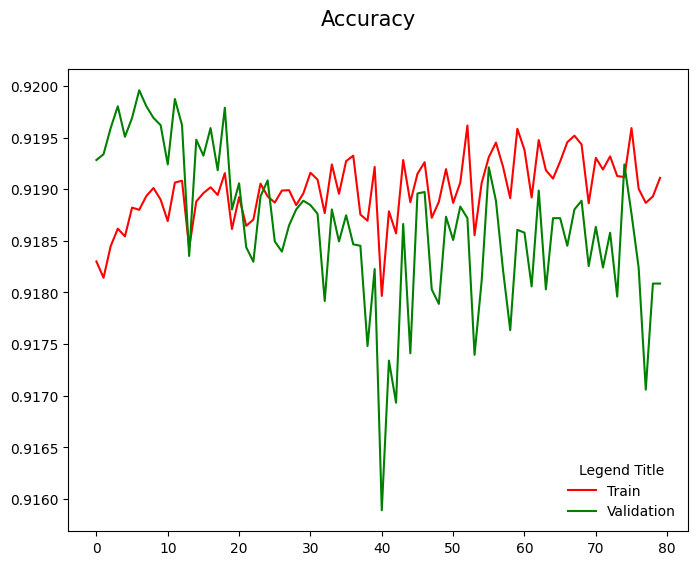

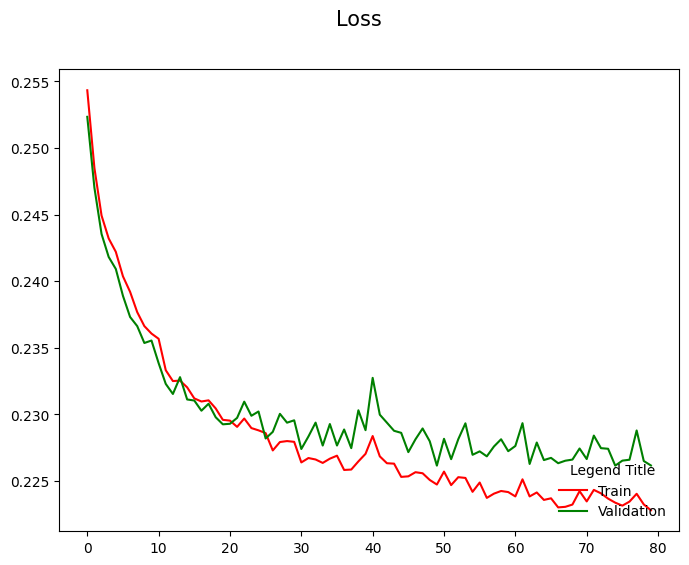

In [78]:
mp = multilayer_perceptron([train_X5.shape[1]] + hidden_layers_topology + [2],
                            epochs = epochs, lr = lr, batch_size = batch_size)
mp.train(train_X5, np.array(train_y_ohe), val_X5, np.array(val_y_ohe))
mp.show(val_show = True)

In [87]:
p_predicted = mp.feedforward(val_X5.T)
acc = mp.compute_accuracy(p_predicted.T, np.array(val_y_ohe))
print("acc val = ", acc)
roc_auc = roc_auc_score(np.array(val_y_ohe)[:, 0], p_predicted.T[:, 0])
print("roc_auc = ", roc_auc)

acc val =  0.9180860947661815
roc_auc =  0.8255813860922026


In [32]:
df_metrics = df_metrics.append(
    pd.DataFrame({'model' : ["Numpy"],
                                "hyperparams" : ["layers=[25] epochs = 80 batch_size = 1000 lr = 0.0001 accumulation_rate = 0.9"],
                                'accuracy' : "0.918086", 
                                'roc_auc' : "0.825581"})
)
df_metrics

/var/folders/9j/mrbb80v92lxdv_3kldctnqq00000gn/T/ipykernel_19384/3202111084.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(


,model,hyperparams,accuracy,roc_auc
0,Naive classifier,baseline,0.919606,0.5
0,Rand_forest,"{'n_est': 1600, 'min_samp_splt': 2, 'min_samp_...",0.920211,0.507280
0,MLP,"rand_st=21, layers = [20], act_f = relu",0.917691,0.82772
0,Numpy,layers=[25] epochs = 80 batch_size = 1000 lr =...,0.918086,0.825581


## Output prediction for test dataset

In [89]:
test_pred = mp.feedforward(test_X5.T).T[:,0]

df = pd.concat([pd.DataFrame({"ID" : test_indices.values}), pd.DataFrame({"TARGET" : test_pred})], axis = 1)
df.to_csv("data/test_predictions.csv", index = False)

# TesorFlow

In [35]:
import tensorflow as tf
# Set random seed for reproducible results 
tf.random.set_seed(21)

train_y_ohe = pd.concat([train_y, (1+train_y)%2], axis = 1)
val_y_ohe = pd.concat([val_y, (1+val_y)%2], axis = 1)

train_y_ohe.columns = ['1', '0']
val_y_ohe.columns = ['1', '0']

In [36]:
class Dense(tf.Module):
    def __init__ (self, output_size, activate = "relu"):
        super().__init__()
        self.output_size = output_size
        self.activate = activate
        self.init = False
    
    def __call__(self, x):
        if not self.init:
            self.w = tf.Variable(
                        tf.random.truncated_normal((x.shape[-1], self.output_size), stddev = 0.1),
                        name = "w", 
                        dtype = tf.float32
                    )
            self.b = tf.Variable(
                        tf.zeros([self.output_size]),
                        name = 'b', 
                        dtype = tf.float32
                    )
            self.init = True
        y = x @ self.w + self.b
        if self.activate == 'relu':
            return tf.nn.relu(y)
        elif self.activate == 'softmax':
            return tf.nn.softmax(y)
        return y



loss_function = lambda y_true, y_pred: tf.reduce_mean(tf.losses.categorical_crossentropy(y_true, y_pred))
opt = tf.optimizers.Adam(learning_rate=0.001)

class mlp(tf.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = Dense(25)
        self.layer_2 = Dense(2, activate="softmax")
 
    def __call__(self, x):
        return self.layer_2(self.layer_1(x))

model = mlp()

BATCH_SIZE = 5000
EPOCHS = 200
train_x_tf = tf.constant(np.array(train_X5), dtype = tf.float32)
train_y_tf = tf.constant(train_y_ohe, dtype = tf.float32)

val_x_tf = tf.constant(np.array(val_X5), dtype = tf.float32)

train_dataset = tf.data.Dataset.from_tensor_slices((train_x_tf, train_y_tf))
train_dataset = train_dataset.shuffle(buffer_size = train_X5.shape[0], seed = 21).batch(BATCH_SIZE)

for e in range(EPOCHS):
    for x, y, in train_dataset:
        with tf.GradientTape() as tape:
            loss = loss_function(y, model(x))
        grads = tape.gradient(loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

    e_loss = loss_function(train_y_tf,
                           model(train_x_tf)).numpy()
    val_rocauc = roc_auc_score(val_y,  model(val_x_tf)[:, 0])
    print("EPOCH:", e, "train_loss:", e_loss, "val_rocauc:",  val_rocauc)

EPOCH: 0 train_loss: 0.3487298 val_rocauc: 0.5637772816771943
EPOCH: 1 train_loss: 0.27793446 val_rocauc: 0.6301159820960456
EPOCH: 2 train_loss: 0.27027005 val_rocauc: 0.6669543519217949
EPOCH: 3 train_loss: 0.26648754 val_rocauc: 0.6849732433306835
EPOCH: 4 train_loss: 0.26386753 val_rocauc: 0.6971391825974618
EPOCH: 5 train_loss: 0.26179105 val_rocauc: 0.7063490692247618
EPOCH: 6 train_loss: 0.26005757 val_rocauc: 0.7134601640130012
EPOCH: 7 train_loss: 0.25853664 val_rocauc: 0.7201760258402043
EPOCH: 8 train_loss: 0.25720885 val_rocauc: 0.7256432469411718
EPOCH: 9 train_loss: 0.25597304 val_rocauc: 0.730547076562533
EPOCH: 10 train_loss: 0.25488305 val_rocauc: 0.7350199344784594
EPOCH: 11 train_loss: 0.25375488 val_rocauc: 0.7398764689301413
EPOCH: 12 train_loss: 0.25276867 val_rocauc: 0.7432454449880023
EPOCH: 13 train_loss: 0.2518333 val_rocauc: 0.7466267480781872
EPOCH: 14 train_loss: 0.25097278 val_rocauc: 0.7507129247609812
EPOCH: 15 train_loss: 0.25000444 val_rocauc: 0.753177

In [41]:
pred = np.where(model(val_x_tf).numpy()[:, 0] > 0.5 , 1, 0)
acc = accuracy_score(val_y, pred)
print("acc =", acc)
val_rocauc = roc_auc_score(val_y,  model(val_x_tf)[:, 0])
print("val_rocauc = ", val_rocauc)

acc = 0.9190433289225485
val_rocauc =  0.8207533949254124


In [42]:
df_metrics = df_metrics.append(
    pd.DataFrame({'model' : ["TensorFlow"],
                                "hyperparams" : ["layers=[25] epochs = 200 batch_size = 5000"],
                                'accuracy' : "0.9190433", 
                                'roc_auc' : "0.8207533"})
)
df_metrics

/var/folders/9j/mrbb80v92lxdv_3kldctnqq00000gn/T/ipykernel_19384/168561520.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(


,model,hyperparams,accuracy,roc_auc
0,Naive classifier,baseline,0.919606,0.5
0,Rand_forest,"{'n_est': 1600, 'min_samp_splt': 2, 'min_samp_...",0.920211,0.507280
0,MLP,"rand_st=21, layers = [20], act_f = relu",0.917691,0.82772
0,Numpy,layers=[25] epochs = 80 batch_size = 1000 lr =...,0.918086,0.825581
0,TensorFlow,layers=[25] epochs = 200 batch_size = 5000,0.9190433,0.8207533


#  Keras from the TensorFlow

In [82]:
import tensorflow as tf
from keras import models
from keras import layers
from keras.constraints import MaxNorm
from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers import SGD
import random as rn

#tf.random.set_seed(0)

os.environ['PYTHONHASHSEED'] = '0'

# Setting the seed for numpy-generated random numbers
np.random.seed(21)

# Setting the seed for python random numbers
rn.seed(21)

# Setting the graph-level random seed.
tf.random.set_seed(21)

from keras import backend as K

session_conf = tf.compat.v1.ConfigProto(
      intra_op_parallelism_threads=1,
      inter_op_parallelism_threads=1)

#Force Tensorflow to use a single thread
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)

K.set_session(sess)

col_counts = train_X5.shape[1]

def auroc(y_true, y_pred):
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.double)

class_weight = {0: 0.75,
                1: 0.25}

network = models.Sequential()

network.add(layers.Dense(units = 22, activation = "relu", input_shape = (col_counts,)))
network.add(layers.Dropout(0.1))
network.add(layers.Dense(units = 22, activation = "relu"))
network.add(layers.Dense(units = 2, activation = "sigmoid"))

sgd = SGD(learning_rate=0.1, momentum=0.9)

network.compile(
    loss = "binary_crossentropy",
    optimizer = tf.keras.optimizers.Adam(),
    #optimizer = sgd,
    metrics = [auroc]
)
network.fit(train_X5, train_y_ohe, validation_data=(val_X5, val_y_ohe), epochs=350, batch_size=10000, class_weight=class_weight, shuffle=False)

Epoch 1/350
29/29 [==============================] - 1s 14ms/step - loss: 0.1638 - auroc: 0.5158 - val_loss: 0.3653 - val_auroc: 0.5752
Epoch 2/350
29/29 [==============================] - 0s 9ms/step - loss: 0.1473 - auroc: 0.6102 - val_loss: 0.3315 - val_auroc: 0.6554
Epoch 3/350
29/29 [==============================] - 0s 9ms/step - loss: 0.1416 - auroc: 0.6639 - val_loss: 0.3195 - val_auroc: 0.6871
Epoch 4/350
29/29 [==============================] - 0s 8ms/step - loss: 0.1389 - auroc: 0.6873 - val_loss: 0.3126 - val_auroc: 0.7049
Epoch 5/350
29/29 [==============================] - 0s 8ms/step - loss: 0.1371 - auroc: 0.7019 - val_loss: 0.3081 - val_auroc: 0.7173
Epoch 6/350
29/29 [==============================] - 0s 7ms/step - loss: 0.1356 - auroc: 0.7134 - val_loss: 0.3028 - val_auroc: 0.7273
Epoch 7/350
29/29 [==============================] - 0s 8ms/step - loss: 0.1344 - auroc: 0.7226 - val_loss: 0.2999 - val_auroc: 0.7351
Epoch 8/350
29/29 [==============================] - 0

In [83]:
y_pred = network.predict(val_X5)
acc = accuracy_score(val_y, np.where(y_pred[:, 0] > 0.5, 1, 0))
print("acc_val = ", acc)
roc_auc = roc_auc_score(np.array(val_y_ohe), y_pred)
print("roc_auc = ", roc_auc)

2220/2220 [==============================] - 1s 319us/step
acc_val =  0.90407950674287
roc_auc =  0.8336328640472244


In [84]:
df_metrics = df_metrics.append(
    pd.DataFrame({'model' : ["Keras"],
                                "hyperparams" : ["layers=[22, dropout(0,1), 22] epochs = 350 batch_size = 10000, class_weight"],
                                'accuracy' : "0.90407", 
                                'roc_auc' : "0.83363"})
)
df_metrics

/var/folders/9j/mrbb80v92lxdv_3kldctnqq00000gn/T/ipykernel_19384/3590628818.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_metrics = df_metrics.append(


,model,hyperparams,accuracy,roc_auc
0,Naive classifier,baseline,0.919606,0.5
0,Rand_forest,"{'n_est': 1600, 'min_samp_splt': 2, 'min_samp_...",0.920211,0.507280
0,MLP,"rand_st=21, layers = [20], act_f = relu",0.917691,0.82772
0,Numpy,layers=[25] epochs = 80 batch_size = 1000 lr =...,0.918086,0.825581
0,TensorFlow,layers=[25] epochs = 200 batch_size = 5000,0.9190433,0.8207533
0,Keras,"layers=[22, dropout(0,1), 22] epochs = 350 bat...",0.90407,0.83363
